# Shivam Bomble
MSAIM 3 2448510 NLP LAB 2

In [2]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import pandas as pd
from datetime import datetime

In [3]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [7]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [ ]:
text = """As an AI enthusiast working at Tech Solutions Inc., I don't hesitate to explore new machine learning models! 
My colleague, John (john.doe@techsolutions.com), who was born on 27-March-2000, and I collaborate on fascinating 
projects. You can reach our team at +1-555-0123 for innovative AI solutions & data analysis."""

In [9]:
tokens = word_tokenize(text)
unique_tokens = set(tokens)
print(f"Number of unique tokens: {len(unique_tokens)}")

Number of unique tokens: 51


1. Text Tokenization and Unique Token Analysis
Insights:

Helps understand vocabulary richness. Identifies unique terms in the text. Useful for text complexity assessment

In [10]:
import string

punct_count = sum(1 for char in text if char in string.punctuation)
text_no_punct = ''.join(char for char in text if char not in string.punctuation)

print(f"Number of punctuation characters: {punct_count}")
print(f"Text without punctuation:\n{text_no_punct}")

Number of punctuation characters: 20
Text without punctuation:
As an AI enthusiast working at Tech Solutions Inc I dont hesitate to explore new machine learning models 
My colleague John johndoetechsolutionscom who was born on 27March2000 and I collaborate on fascinating 
projects You can reach our team at 15550123 for innovative AI solutions  data analysis


2. Punctuation Analysis
Insights:
Indicates writing style. Helps in text normalization. Useful for text cleaning

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


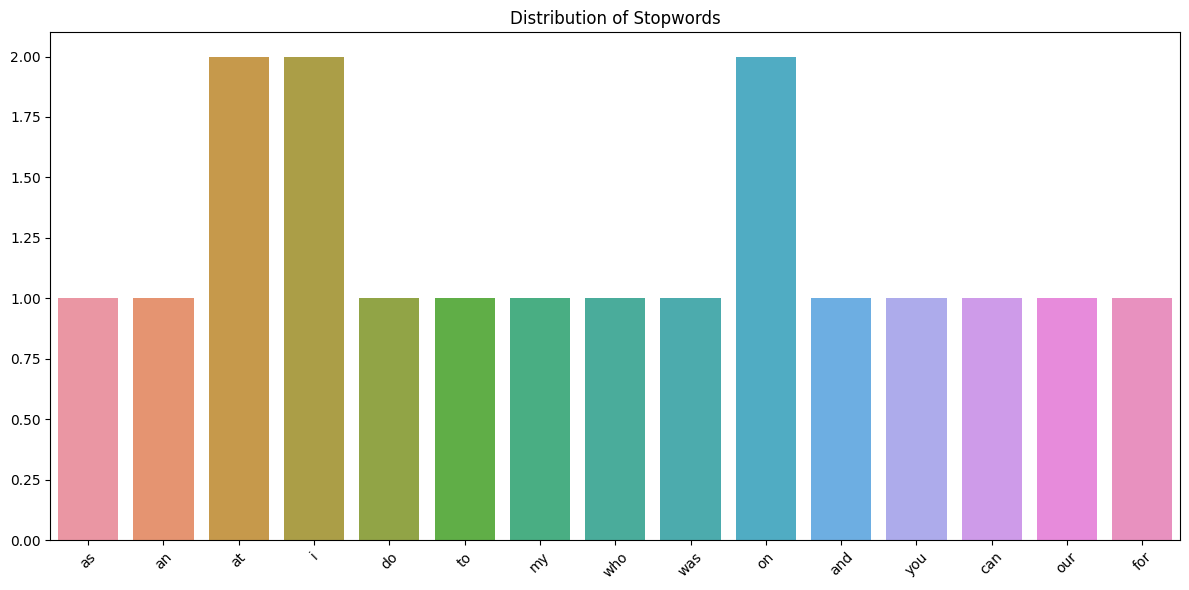

In [11]:
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
text_tokens = word_tokenize(text.lower())
stopwords_in_text = [word for word in text_tokens if word in stop_words]
stopword_freq = Counter(stopwords_in_text)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(stopword_freq.keys()), y=list(stopword_freq.values()))
plt.xticks(rotation=45)
plt.title('Distribution of Stopwords')
plt.tight_layout()
plt.show()

3. Stopwords Analysis
Insights:
Shows language pattern usage. Identifies common words frequency. Helps in content density analysis

In [12]:
text_no_stop = ' '.join([word for word in text_tokens if word not in stop_words])
print("Text without stopwords:")
print(text_no_stop)

Text without stopwords:
ai enthusiast working tech solutions inc. , n't hesitate explore new machine learning models ! colleague , john ( john.doe @ techsolutions.com ) , born 27-march-2000 , collaborate fascinating projects . reach team +1-555-0123 innovative ai solutions & data analysis .


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


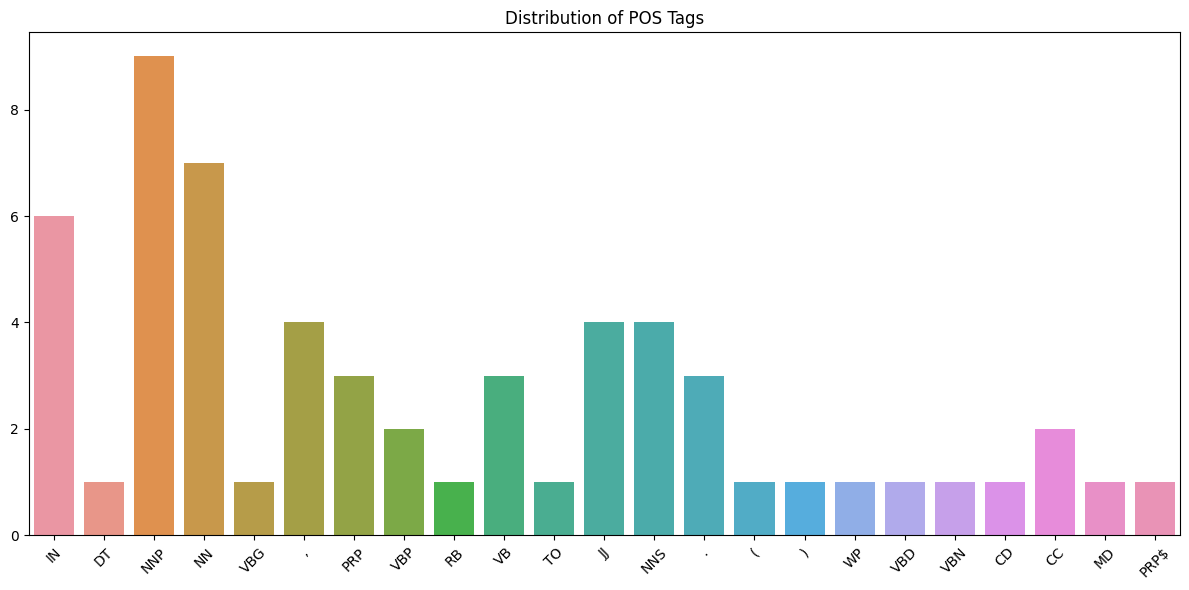

In [13]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

pos_tags = pos_tag(tokens)
pos_freq = Counter(tag for word, tag in pos_tags)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(pos_freq.keys()), y=list(pos_freq.values()))
plt.xticks(rotation=45)
plt.title('Distribution of POS Tags')
plt.tight_layout()
plt.show()

4. POS (Part of Speech) Tagging
Insights: Reveals grammatical structure. Shows language complexity. Identifies sentence patterns

In [14]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmas = set(lemmatizer.lemmatize(word.lower()) for word in tokens)
print(f"Number of unique lemmas: {len(lemmas)}")

Number of unique lemmas: 50


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


5. Lemmatization
Insights: Reduces word variations. Shows core vocabulary. Helps in standardization.

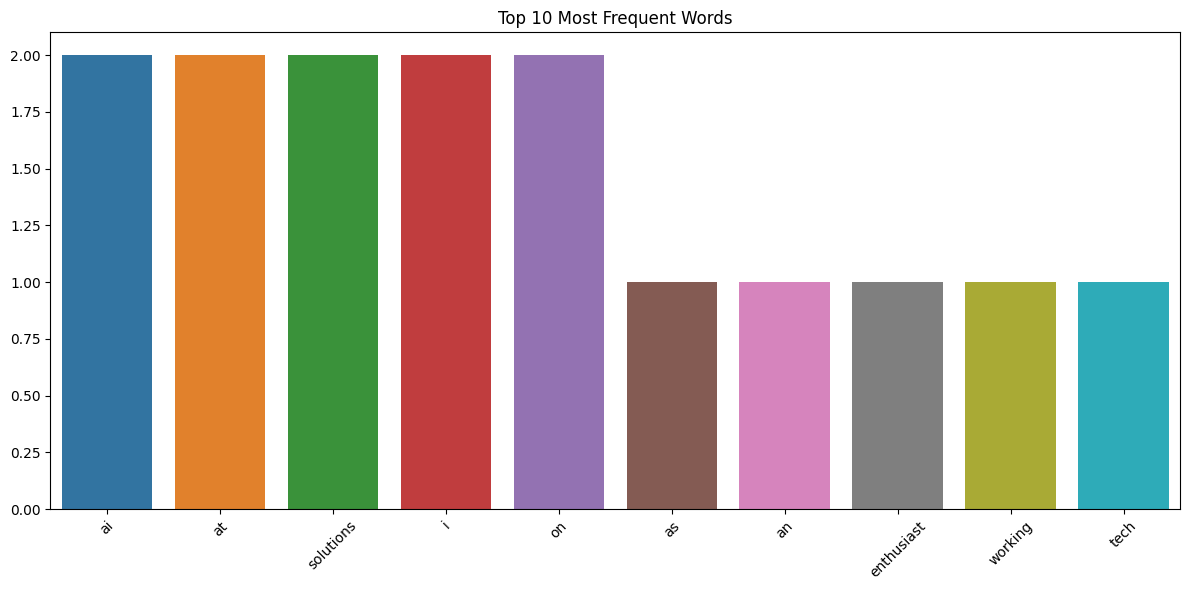

In [17]:
word_freq = Counter(word.lower() for word in tokens if word.isalnum())
top_10 = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_10.keys()), y=list(top_10.values()))
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Words')
plt.tight_layout()
plt.show()

6. Word Frequency Analysis
Insights: Identifies key terms. Shows content focus. Reveals writing patterns

In [18]:
from nltk.util import ngrams

words = [word.lower() for word in tokens if word.isalnum()]
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))
quadgrams = list(ngrams(words, 4))

print(f"Unique bigrams: {len(set(bigrams))}")
print(f"Unique trigrams: {len(set(trigrams))}")
print(f"Unique quadgrams: {len(set(quadgrams))}")

Unique bigrams: 41
Unique trigrams: 40
Unique quadgrams: 39


7. N-gram Analysis
Insights: Shows word combinations. Reveals phrase patterns. Identifies common expressions

In [19]:
import re
from datetime import datetime

date_pattern = r'\d{1,2}-[A-Za-z]+-\d{4}'
dates = re.findall(date_pattern, text)
converted_dates = []

for date in dates:
    try:
        date_obj = datetime.strptime(date, '%d-%B-%Y')
        converted_dates.append(date_obj.strftime('%d-%m-%Y'))
    except ValueError:
        pass

print("Converted dates:", converted_dates)

Converted dates: ['27-03-2000']


8. Date Extraction and Standardization
Insights: Temporal information extraction. Date format standardization. Timeline analysis

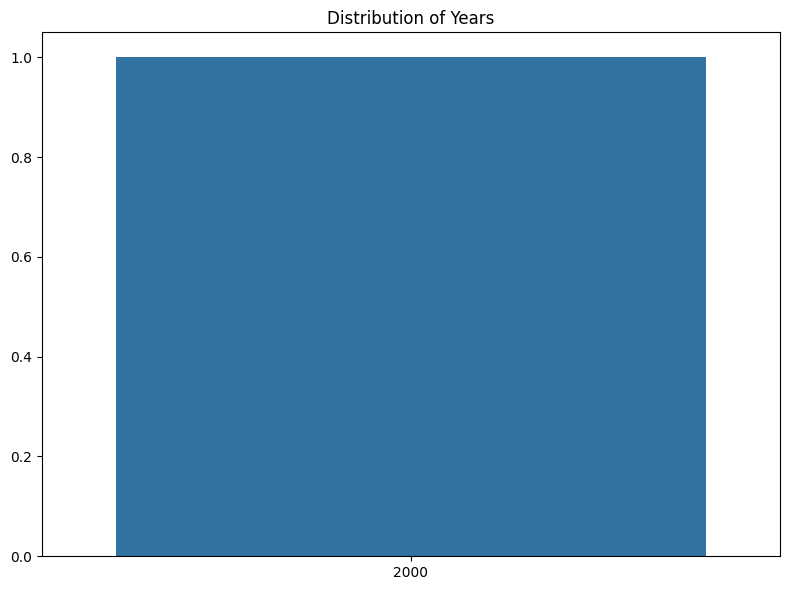

In [20]:
years = [datetime.strptime(date, '%d-%B-%Y').year for date in dates]
year_freq = Counter(years)

plt.figure(figsize=(8, 6))
sns.barplot(x=list(year_freq.keys()), y=list(year_freq.values()))
plt.title('Distribution of Years')
plt.tight_layout()
plt.show()

9. Phone Number Validation
Insights: Pattern recognition. Data validation. Contact information extraction

In [21]:
phone_pattern = r'\+\d{1,3}-\d{3,4}-\d{4}'
phone_numbers = re.findall(phone_pattern, text)
valid_phones = []

for phone in phone_numbers:
    if len(phone.replace('+', '').replace('-', '')) == 10:  # Basic validation
        valid_phones.append(phone)

print("Valid phone numbers:", valid_phones)

Valid phone numbers: []
